In [178]:
import numpy as np
import tensorflow as tf
path = "output/wave/single/test/run_20210715-104547/trial_0/model"
model_small = tf.keras.models.load_model(path)
model_small.path = path
path = "output/wave/single/test/run_20210715-112246/trial_0/model"
model_large_1 = tf.keras.models.load_model(path)
model_large_1.path = path
path = "output/wave/single/test/run_20210715-101751/trial_0/model"
model_large_2 = tf.keras.models.load_model(path)
model_large_2.path = path

In [208]:
path = "output/toy/single/analysis/run_20210715-154843/trial_0/model"
model_toy_gr_none = tf.keras.models.load_model(path)
model_toy_gr_none.path = path

path = "output/toy/single/analysis/run_20210715-155156/trial_0/model"
model_toy_gr_zero = tf.keras.models.load_model(path)
model_toy_gr_zero.path = path

# path = "output/toy/single/analysis/run_20210715-154843/trial_0/model"
# model_toy_gr_none = tf.keras.models.load_model(path)
# model_toy_gr_none.path = path

In [154]:
from matplotlib import pyplot as plt

In [226]:
x_min, x_max = 0, 1
t_min, t_max = 0, 5
dx = 0.05
dt = 0.05

nx = int((x_max - x_min) / dx)
if dt is None:
    dt = dx
nt = int((t_max - t_min) / dt)
x_lin = np.linspace(x_min, x_max, nx)
y_lin = np.linspace(x_min, x_max, nx)
t_lin = np.linspace(t_min, t_max, nt)
t_g, x_g, y_g = np.meshgrid(t_lin, x_lin, y_lin, indexing="ij")

# x = x_g.flatten()
# y = y_g.flatten()
# t = t_g.flatten()

def flatten_end(arr):
    return arr.reshape(arr.shape[0], -1)
x = flatten_end(x_g)
y = flatten_end(y_g)
t = flatten_end(t_g)

X = np.stack([x,y,t], axis=-1)
X_wave = X
T_wave = t_lin

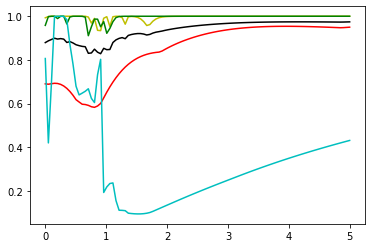

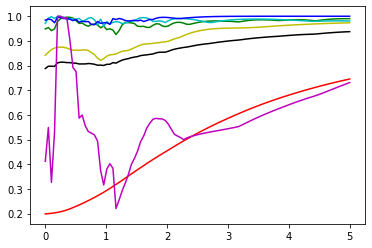

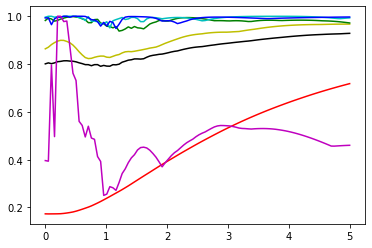

In [227]:
def mu_evaluation(model, X):
    y = X
    qs = []
    mus = []
    for i, l in enumerate(model.layers):
        z = l(y)
        if isinstance(l, Dense):
            w, b = l.weights
            #print(w.shape, y.shape, l, i)
            z_pre_A = tf.einsum("io, ni -> no", w, y)
            z_pre_B = b
            z_pre = z_pre_A + z_pre_B
            z_2 = l.activation(z_pre)
            assert (np.abs(z_2 - z) < 0.01).all()
            q = z_pre
            # q = 1/(1 + np.exp(-q))  
            q = np.max(q, 0)
            q = np.tanh(q)
            q = np.abs(q)
            mu = np.mean(q)
            mus.append(mu)
            qs.append(q.flatten())
            #print(mu)
        elif isinstance(l, InputLayer):
            pass
        elif isinstance(l, Dropout):
            pass
        else:
            raise ValueError("Unsupported layer " + str(l))
        y = z
    mu = np.mean(np.concatenate(qs))
    return mu, mus

def in_ring(x, x_inner, x_outer):
    return ((-x_outer <= x) & (x <= -x_inner)) | ((x_inner <= x) & (x <= x_outer))

def ring(x_inner, x_outer):
    dx = 0.01
    nx = int( 2* x_outer / dx)
    x_lin = np.linspace(-x_outer, x_outer, nx)
    y_lin = np.linspace(-x_outer, x_outer, nx)
    x_g, y_g = np.meshgrid(x_lin, y_lin)
    x = x_g.flatten()
    y = y_g.flatten()
    idx = in_ring(x, x_inner, x_outer) | in_ring(y, x_inner, x_outer)
    X = np.stack([x,y], axis=-1)
    X = X[idx]
    return X

dt = 0.1
t_min, t_max = 0, 5
nt = int((t_max - t_min) / dt)
T = np.linspace(t_min, t_max, nt)
X = [ring(t * dt, t * dt + dt) for t in T]
#plt.scatter(X[:,0], X[:,1])

def mu_over_X(model, X, T):
    mu_all = np.zeros((len(X),))
    mus_all = []
    for i, t in enumerate(X):
        mu, mus = mu_evaluation(model, X[i])
        mu_all[i] = mu
        mus_all.append(np.array(mus))
    mus_all = np.stack(mus_all, axis=1)

    plt.plot(T, mu_all, c="black")
    mu_all_diff = np.diff(mu_all) / np.diff(T)
    #plt.plot(t_lin, mu_all_diff, c="black")
    colors = ["r", "y", "g", "c", "b", "m"]
    for i, mus_all_i in enumerate(mus_all):
        plt.plot(T, mus_all_i, c=colors[i])
    #plt.savefig(model.path + "/../figs/neuron_saturation.png")
    plt.show()

    # plt.plot(T, mu_all, c="black")
    # plt.show()
    # for i, mus_all_i in enumerate(mus_all):
    #     plt.plot(T, mus_all_i, c=colors[i])
    #     plt.show()

#mu_over_X(model_toy_gr_none, X, T)
mu_over_X(model_small, X_wave, T_wave)
mu_over_X(model_large_1, X_wave, T_wave)
mu_over_X(model_large_2, X_wave, T_wave)
#mu, mus = mu_evaluation(model_toy_gr_none, X)

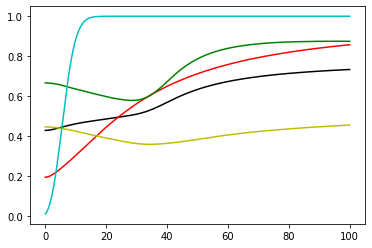

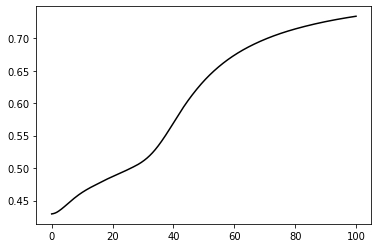

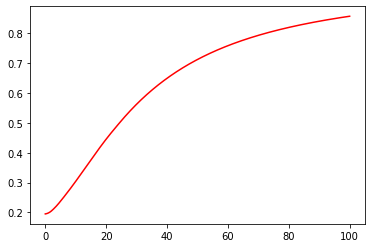

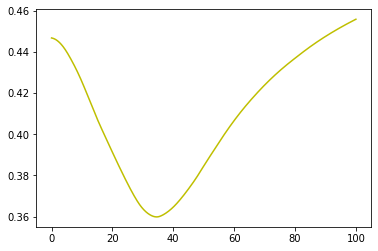

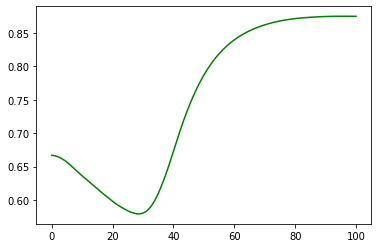

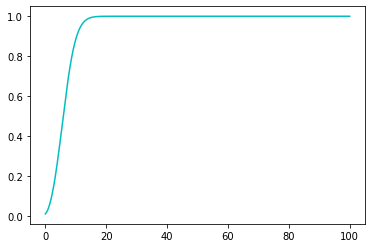

In [214]:
mu_over_X(model_toy_gr_zero, X, T)

In [216]:
np.max(np.array([0,1,2]), 0)

2

In [185]:
from tensorflow.keras.layers import Dropout, InputLayer, Dense

model = model_toy_gr_none
def mu_on_wave(model, )
    X = wave_data()
    mu_all = np.zeros((len(t_lin),))
    mus_all = []
    for i, t in enumerate(t_lin):
        mu, mus = mu_evaluation(model, X[i])
        mu_all[i] = mu
        mus_all.append(np.array(mus))
    mus_all = np.stack(mus_all, axis=1)

plt.plot(t_lin, mu_all, c="black")
mu_all_diff = np.diff(mu_all) / np.diff(t_lin)
#plt.plot(t_lin, mu_all_diff, c="black")
colors = ["r", "y", "g", "c", "b", "m"]
for i, mus_all_i in enumerate(mus_all):
    plt.plot(t_lin, mus_all_i, c=colors[i])
plt.savefig(model.path + "/../figs/neuron_saturation.png")
plt.show()

ValueError: Input 0 of layer h0 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (400, 3)

In [180]:
t_lin.shape

(40,)

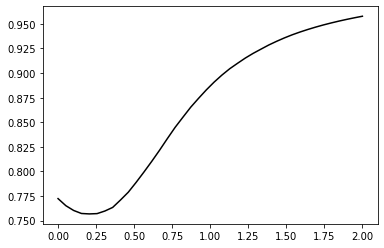

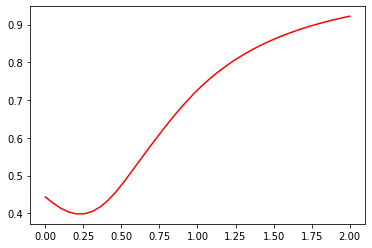

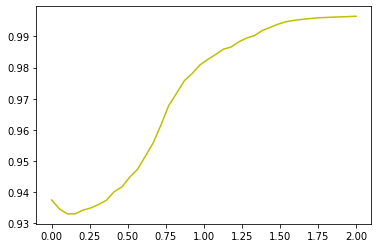

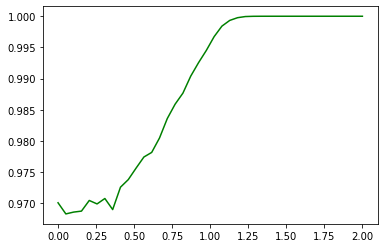

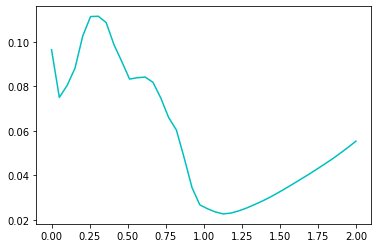

In [177]:
plt.plot(t_lin, mu_all, c="black")
plt.show()
for i, mus_all_i in enumerate(mus_all):
    plt.plot(t_lin, mus_all_i, c=colors[i])
    plt.show()

In [15]:
Y = model.predict(X)

In [29]:
from keras import backend as K
i = 1
get_layer_output = K.function([model.layers[0].input], [model.layers[i].output])
outputs = get_layer_output([X])[0]
np.min(outputs)

-0.986351

In [38]:
y = model.layers[0](X)
z = model.layers[1](y)

In [110]:
from tensorflow.keras.layers import Dropout, InputLayer, Dense

def mu_evaluation(model, X):
    y = X
    qs = []
    mus = []
    for i, l in enumerate(model.layers):
        z = l(y)
        if isinstance(l, Dense):
            w, b = l.weights
            #print(w.shape, y.shape, l, i)
            z_pre_A = tf.einsum("io, ni -> no", w, y)
            z_pre_B = b
            z_pre = z_pre_A + z_pre_B
            z_2 = l.activation(z_pre)
            assert (np.abs(z_2 - z) < 0.01).all()
            q = np.abs(np.tanh(z_pre))
            mu = np.mean(q)
            mus.append(mu)
            qs.append(q.flatten())
            #print(mu)
        elif isinstance(l, InputLayer):
            pass
        elif isinstance(l, Dropout):
            pass
        else:
            raise ValueError("Unsupported layer " + str(l))
        y = z
    mu = np.mean(np.concatenate(qs))
    return mu, mus

tensorflow.python.keras.layers.core.Dense

In [95]:
model.layers[2]

In [66]:
z

<tf.Tensor: shape=(1000, 20), dtype=float32, numpy=
array([[ 0.0591615 ,  1.3261199 ,  0.70135826, ...,  0.22404447,
        -0.16206604,  0.05292303],
       [-0.08490568,  1.1008941 ,  0.79541636, ...,  0.35972604,
        -0.06878453, -0.01345551],
       [-0.21070713,  0.8756684 ,  0.88947445, ...,  0.4954076 ,
         0.03428678, -0.07689911],
       ...,
       [-0.98165345,  0.46223593, -0.8606101 , ...,  2.823868  ,
        -0.3564778 , -0.7341896 ],
       [-0.9841756 ,  0.23701024, -0.84686303, ...,  2.9595497 ,
        -0.2848388 , -0.75128365],
       [-0.986351  ,  0.01178432, -0.8317601 , ...,  3.0952313 ,
        -0.2052247 , -0.7672783 ]], dtype=float32)>